# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

<IPython.core.display.Javascript object>


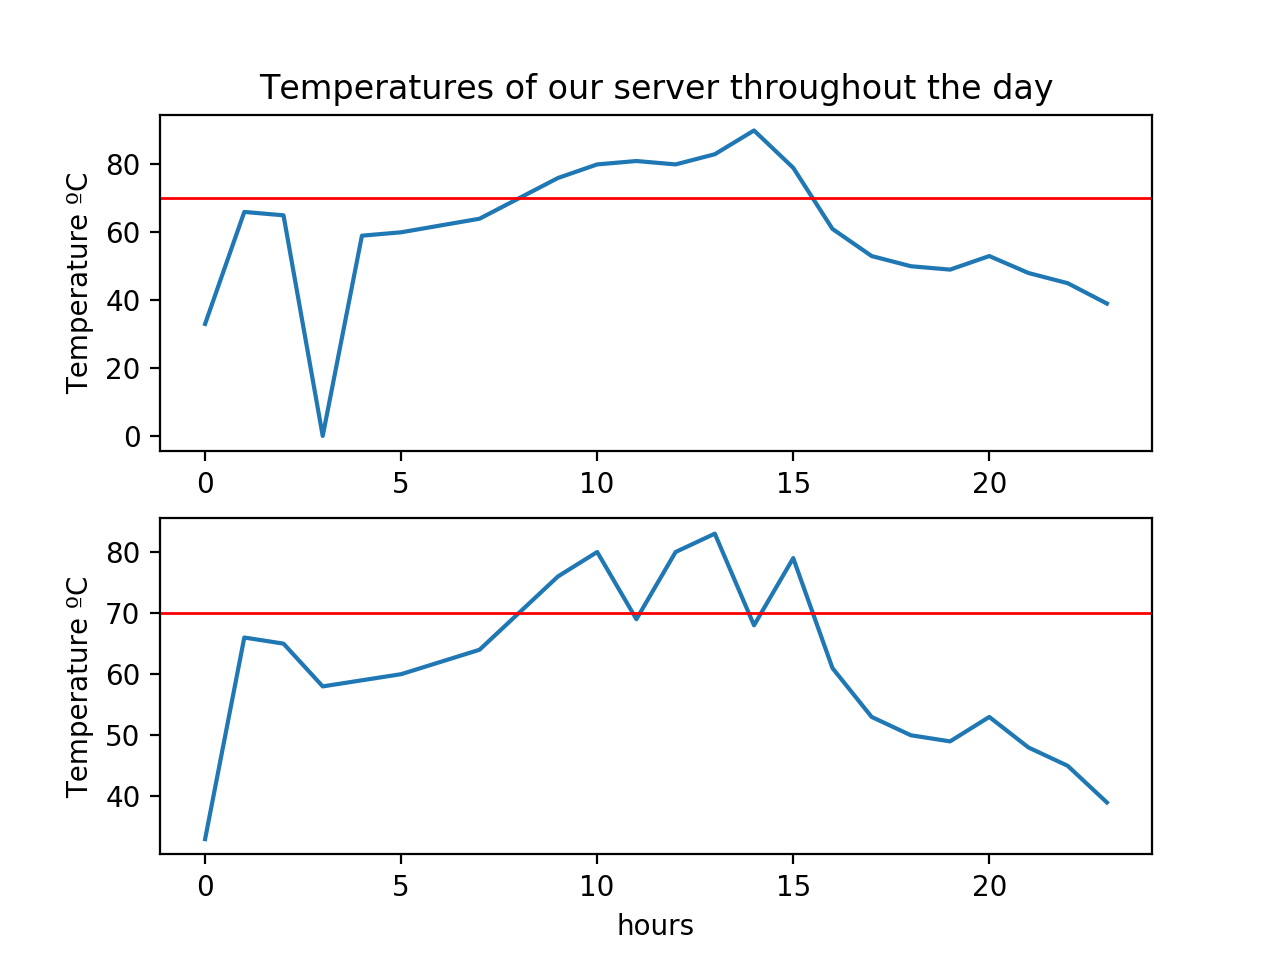

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

In [2]:
# import
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

x = list(range(len(y)))

# plot
plt.ion()

plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [3]:
# assign a variable to the list of temperatures
TEMPERATURES_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]


# 1. Calculate the minimum of the list and print the value using print()
temperature_min = min(TEMPERATURES_C)
print(temperature_min)

# 2. Calculate the maximum of the list and print the value using print()
temperature_max = max(TEMPERATURES_C)
print(temperature_max)

# 3. Items in the list that are greater than 70ºC and print the result
temperatures_high = filter((70).__lt__, TEMPERATURES_C)
print(list(temperatures_high))

# 4. Calculate the mean temperature throughout the day and print the result
temperature_mean = np.mean(TEMPERATURES_C)
temperature_median = np.mean(TEMPERATURES_C)


print(temperature_mean)
print(temperature_median)


# 5.1 Solve the fault in the sensor by estimating a value
outliers=[]

def detect_outlier(data):
    threshold=2
    temperature_std = np.std(TEMPERATURES_C)

    for i in data:
        z_score = (i - temperature_mean) / temperature_std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

temperatures_outliers = detect_outlier(TEMPERATURES_C)

print(temperatures_outliers)


# 5.2 Update of the estimated value at 03:00 on the list
temperatures_normalized = TEMPERATURES_C

def normalize_outlier(data, threshold):
    temperature_std = np.std(TEMPERATURES_C)
    print(temperature_std)
    for i in range(len(data)):
        z_score = (data[i] - temperature_mean) / temperature_std
        if np.abs(z_score) > threshold:
            data[i] = int(temperature_mean)
    return data

temperatures_normalized = normalize_outlier(TEMPERATURES_C, 3)

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

plt.subplot(2, 1, 2)
plt.plot(x, temperatures_normalized)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')


# Bonus: convert the list of ºC to ºFarenheit
        


0
83
[76, 80, 80, 83, 79]
58.833333333333336
58.833333333333336
[0]
17.911045629877545


Text(0, 0.5, 'Temperature ºC')

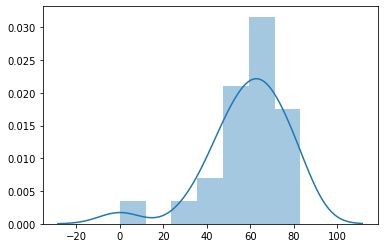

In [31]:
import seaborn as sns

sns.distplot(TEMPERATURES_C)

## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [3]:
# Print True or False depending on whether you would change the cooling system or not



## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [4]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC



In [5]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?



In [6]:
# 3. Average of each of the lists (ºC and ºF). How they relate?



In [7]:
# 4. Standard deviation of each of the lists. How they relate?

